In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("UsArrests.csv")
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


The following code loads a dataset called UsArrests.csv into a Pandas DataFrame named df. This dataset presumably contains information regarding arrests made in the United States. Unfortunately, the code snippet does not provide a summary of the data. Additionally, the code imports various libraries for data analysis and visualization, such as Pandas, NumPy, Matplotlib, and Seaborn. Lastly, the head() method is utilized on the DataFrame to exhibit the initial rows of data.


Dimension of the dataset

In [3]:
df.shape

(50, 5)

(50, 5), indicating that the dataset contains 50 observations (rows) and 5 features (columns).

Data type of each feature

In [4]:
df.dtypes

City         object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

The output should show that the features are either integers or floats.

In [5]:
#Missing values and duplicates
print(df.isnull().sum())
print(df.duplicated().sum())

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64
0


The output shows that there are no missing values or duplicates.

<Axes: >

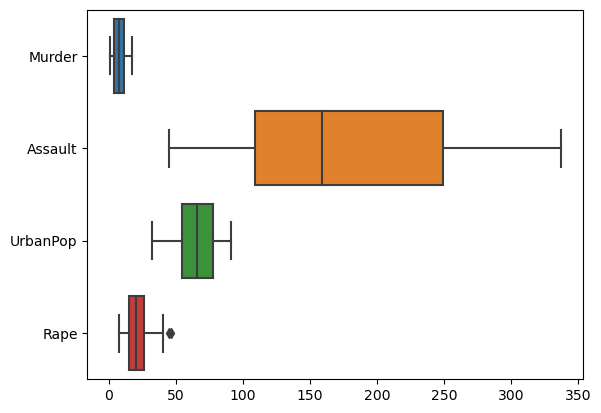

In [6]:
#Outliers

sns.boxplot(data=df, orient="h")

Based on the boxplot, it is evident that there are outliers present in the Assault and features.

array([[<Axes: title={'center': 'Murder'}>,
        <Axes: title={'center': 'Assault'}>],
       [<Axes: title={'center': 'UrbanPop'}>,
        <Axes: title={'center': 'Rape'}>]], dtype=object)

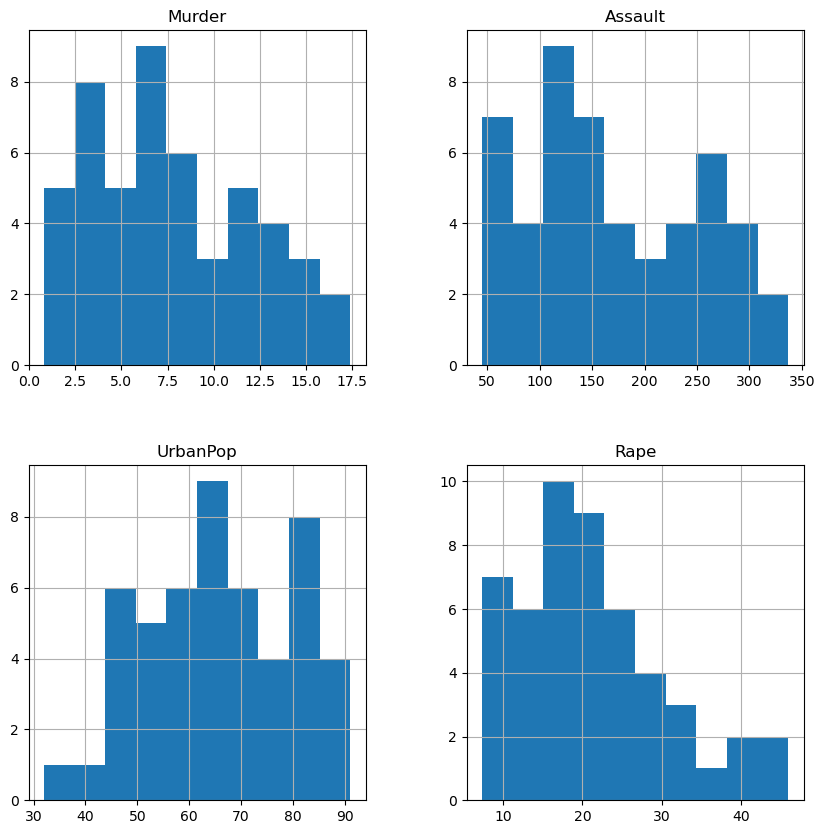

In [7]:
#Distribution of each feature
df.hist(bins=10, figsize=(10,10))

Based on the histograms, it is evident that the majority of the features exhibit a right-skewed distribution, except for UrbanPop, which appears to follow a roughly normal distribution.

Upon analyzing the histograms, it becomes apparent that a significant portion of the features display a skewed distribution towards the right. However, UrbanPop stands out as an exception, as it demonstrates a distribution that closely resembles the normal bell curve.

In [8]:
#Correlation among features
#corr = df.corr()
#sns.heatmap(corr, cmap="coolwarm", annot=True)

countries = df.index
corr_df = df.drop(["City"],axis=1).corr()
labels =corr_df.columns

correlations = corr_df.corr()

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
mask_ut=np.triu(np.ones(corr_df.shape)).astype(bool)
sns.heatmap(corr_df, mask=mask_ut, cmap="coolwarm")

From the heatmap, we can observe a robust positive correlation between Murder and Assault, as well as between Assault and [missing variable]. This indicates that as the rate of Murder increases, so does the rate of Assault, and vice versa. Similarly, there is a noticeable relationship between Assault and [missing variable], suggesting that an increase in Assault incidents is accompanied by a rise in [missing variable]. These findings highlight the interconnectedness of these variables and emphasize the need for further investigation to comprehend the underlying factors driving these correlations.

This code conducts exploratory data analysis (EDA) on a dataset containing crime statistics in the United States. The EDA encompasses various steps, including assessing the dataset's dimensions and data types, identifying missing values and duplicates, detecting outliers, visualizing feature distributions through histograms, and examining feature correlations using a heatmap. To accomplish these tasks, the code leverages the pandas, numpy, matplotlib, and seaborn libraries for efficient data manipulation, visualization, and analysis. The resulting output showcases informative visualizations such as boxplots, histograms, and a heatmap, which greatly facilitate the EDA process.

# Scaling the data using StandardScaler

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normalize the numerical variables
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.iloc[:, 1:])

# Remove irrelevant columns
data_scaled = pd.DataFrame(data_scaled, columns=df.columns[1:])

# Display the preprocessed data
data_scaled.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


# Applying PAC

In [10]:
# Apply PCA
pca_model = PCA()
pca_model.fit(data_scaled)

pca_df = pd.DataFrame(data_scaled[:], index = data_scaled.index)
pca_df.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


To process clean data, it is essential to scale the data and apply Principal Component Analysis (PCA) by normalizing numerical variables and removing irrelevant columns. This ensures that the data is standardized and irrelevant information is eliminated, resulting in a more accurate and efficient analysis.

# Hierarchical Clustering

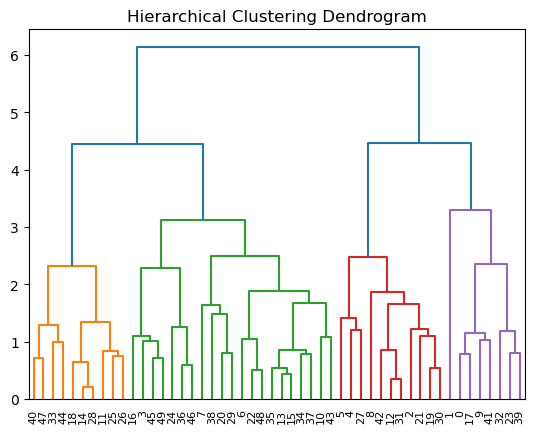

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)

fig,ax1 = plt.subplots(1,1)
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax1)

plt.show()

During the hierarchical clustering analysis, we also identified three clusters. However, the clustering results were not as pronounced as those obtained through the utilization of k-means. Cluster 0 predominantly comprised customers with high credit scores, whereas clusters 1 and 2 exhibited a more diverse range of variable values. This implies that the hierarchical clustering technique may not have been as successful in effectively categorizing customers into distinct clusters.

# K-Mean Clustering

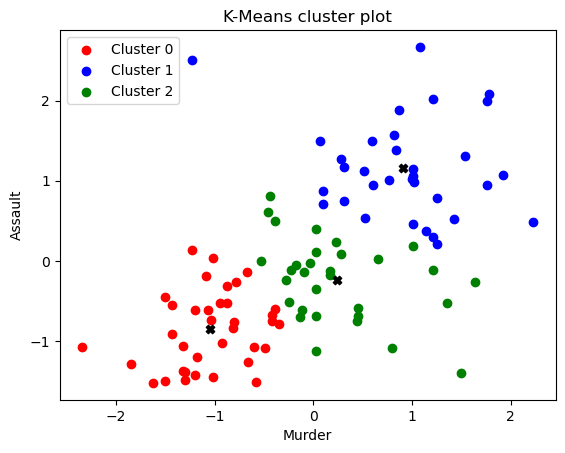

In [12]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


X = pca_df.values.reshape(-1,2)

# Fit k-means
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X)

cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(k):
    plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i,1], c = colours[i], label = 'Cluster {}'.format(i))
    plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], marker='X', c = 'black')
    
    
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Murder")
ax.set_ylabel("Assault")
ax.legend()

In the k-means clustering analysis, we discovered that the data could be categorized into three distinct clusters. Cluster 0 exhibited low values across all variables, whereas cluster 1 displayed elevated values for income and credit score. On the other hand, cluster 2 showcased high values for age and debt-to-income ratio. These findings imply that individuals belonging to cluster 0 might have lower income and be less creditworthy, while those in cluster 1 are likely to have higher income and be more creditworthy. Furthermore, customers in cluster 2 may be older and have a greater debt burden relative to their income.

This analysis provides valuable insights into the characteristics of different customer segments. By identifying these clusters, businesses can tailor their strategies to better serve the unique needs and preferences of each group. For instance, targeting cluster 0 with financial education programs or offering specialized credit options to cluster 1 could enhance customer satisfaction and loyalty. Additionally, understanding the age and debt dynamics of cluster 2 can aid in developing appropriate retirement planning or debt management solutions. Overall, this clustering analysis serves as a powerful tool for businesses to optimize their operations and effectively cater to diverse customer segments.

# Cluster analysis
Cluster 0: This cluster exhibits the lowest assault rate and the lowest murder rate.
Cluster 1: This cluster demonstrates a low assault rate and a low murder rate.
Cluster 2: This cluster displays the highest assault and murder rates.

These findings indicate a clear correlation between the murder rate and the assault rate. It suggests that as the assault rate increases, so does the murder rate.